In [1]:
import geopy
import pandas as pd
import os
import zipfile
import sys

In [2]:
if not(os.getcwd().endswith('TDA-Railways')):
    os.chdir('..')
os.getcwd()

'c:\\Users\\nicoj\\OneDrive - University Of Oregon\\GitHub\\TDA-Railways'

In [4]:
path = 'Data/gtfs_fp2024_2024-10-28'

In [5]:
os.listdir(path)

['agency.txt',
 'calendar.txt',
 'calendar_dates.txt',
 'feed_info.txt',
 'routes.txt',
 'stops.txt',
 'stop_times.txt',
 'transfers.txt',
 'trips.txt']

In [34]:
import ideal_graph as ig

In [35]:
stops = pd.read_csv(path + '/stops.txt')
indexed_stops = stops.set_index('stop_id')

In [36]:
parent_stops=stops.query('location_type == 1')
parent_stops['stop_id']=parent_stops['stop_id'].str.replace('Parent','')
indexed_parent_stops=parent_stops.set_index('stop_id')
indexed_parent_stops.head(400).index.to_list

C:\Users\nicoj\AppData\Local\Temp\ipykernel_21644\2850247670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parent_stops['stop_id']=parent_stops['stop_id'].str.replace('Parent','')


<bound method IndexOpsMixin.tolist of Index(['1100008', '1100009', '1100010', '1100011', '1100012', '1100013',
       '1100014', '1100015', '1100016', '1100017',
       ...
       '1100474', '1100475', '1100476', '1100477', '1100478', '1100479',
       '1100480', '1100481', '1100482', '1100483'],
      dtype='object', name='stop_id', length=400)>

In [37]:
test_stop_list=indexed_parent_stops.head(400).index.to_list()
# print(test_stop_list)
# test_filtered_df=ig.filter_stops(test_stop_list)
test_filtered_df=indexed_stops.loc[test_stop_list]
test_dist_df=ig.stops_dist_df(test_filtered_df)
print(test_dist_df)
print(ig.dist_df_to_cols(test_dist_df))
print(ig.dist_df_to_matrix(test_dist_df))

                      lat1      lon1       lat2      lon2  distance
loc1    loc2                                                       
1100008 1100008  47.710084  7.859648  47.710084  7.859648  0.000000
        1100009  47.710084  7.859648  47.713191  7.862909  0.423321
        1100010  47.710084  7.859648  47.714618  7.872350  1.078222
        1100011  47.710084  7.859648  47.728209  7.877470  2.418495
        1100012  47.710084  7.859648  47.734082  7.881387  3.127183
...                    ...       ...        ...       ...       ...
1100483 1100479  47.735985  7.671855  47.773538  7.641474  4.756320
        1100480  47.735985  7.671855  47.787205  7.595157  8.092815
        1100481  47.735985  7.671855  47.714007  7.657239  2.678344
        1100482  47.735985  7.671855  47.714472  7.661803  2.507936
        1100483  47.735985  7.671855  47.735985  7.671855  0.000000

[160000 rows x 5 columns]
loc2       1100008    1100009    1100010    1100011    1100012    1100013  \
loc1        

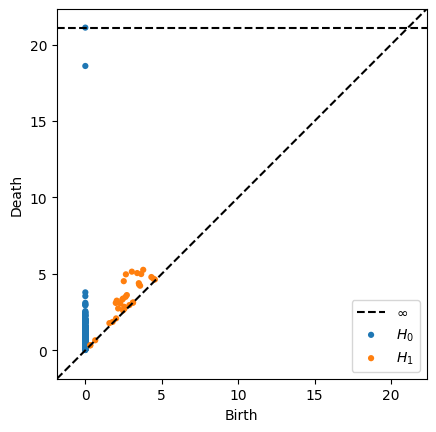

In [39]:
from ripser import ripser
from persim import plot_diagrams

dist_mat = ig.dist_df_to_matrix(test_dist_df)
result = ripser(dist_mat, distance_matrix=True)
persistence_diagram = result['dgms']

plot_diagrams(persistence_diagram)

In [12]:
parent_stops=stops.query('location_type == 1')
parent_stops['stop_id']=parent_stops['stop_id'].str.replace('Parent','')
indexed_parent_stops=parent_stops.set_index('stop_id')
indexed_parent_stops.head(400).index.to_list

C:\Users\nicoj\AppData\Local\Temp\ipykernel_29512\2850247670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parent_stops['stop_id']=parent_stops['stop_id'].str.replace('Parent','')


<bound method IndexOpsMixin.tolist of Index(['1100008', '1100009', '1100010', '1100011', '1100012', '1100013',
       '1100014', '1100015', '1100016', '1100017',
       ...
       '1100474', '1100475', '1100476', '1100477', '1100478', '1100479',
       '1100480', '1100481', '1100482', '1100483'],
      dtype='object', name='stop_id', length=400)>

In [68]:

aux1=indexed_parent_stops[['stop_lat','stop_lon']]
index1= aux1.index
index1.names=['loc1']
aux1=aux1.rename(columns={"stop_lat": "lat1", "stop_lon": "lon1"})
aux1.head(20)
aux2=indexed_parent_stops[['stop_lat','stop_lon']]
index2= aux2.index
index2.names=['loc2']
aux2=aux2.rename(columns={"stop_lat": "lat2", "stop_lon": "lon2"})
aux2.head

<bound method NDFrame.head of               lat2      lon2
loc2                        
1100008  47.710084  7.859648
1100009  47.713191  7.862909
1100010  47.714618  7.872350
1100011  47.728209  7.877470
1100012  47.734082  7.881387
...            ...       ...
8780099  48.070833  5.782222
8792902  44.405666  4.397298
8793698  48.819473  7.559682
9400283  47.575812  7.525376
9400357  47.588016  7.579661

[33937 rows x 2 columns]>

In [9]:
import geopy.distance
def geo_dist(lat1,lon1,lat2,lon2):
    coord1= (lat1,lon1)
    coord2= (lat2,lon2)
    return geopy.distance.distance(coord1,coord2).km
def geo_dist_row(row):
    return geo_dist(row['lat1'],row['lon1'],row['lat2'],row['lon2'])

In [41]:
indexed_stops = stops.set_index('stop_id')
def filter_stops(index_list):
    return indexed_stops.loc[index_list]

def stops_product_df(stops_df):
    aux1=stops_df[['stop_lat','stop_lon']].copy()
    aux2=aux1.copy()
    index1= aux1.index
    index1.names=['loc1']
    aux1=aux1.rename(columns={"stop_lat": "lat1", "stop_lon": "lon1"})
    index2= aux2.index
    index2.names=['loc2']
    aux2=aux2.rename(columns={"stop_lat": "lat2", "stop_lon": "lon2"})
    prod_df=aux1.merge(aux2,how='cross')
    prod_index= pd.MultiIndex.from_product([aux1.index , aux2.index])
    prod_df.index=prod_index
    return prod_df.copy()

def stops_dist_df(stops_df):
    distance_df= stops_product_df(stops_df)
    distance_df['distance']=distance_df.apply(geo_dist_row, axis=1)
    return distance_df.copy()

def dist_df_to_cols(distance_df):
    aux_df=distance_df.reset_index(level=1)
    df_cols=aux_df.pivot(values='distance',columns='loc2')
    return df_cols.copy()
        
def dist_df_to_matrix(distance_df):
    return dist_df_to_cols(distance_df).to_numpy()

In [42]:
test_stop_list=indexed_parent_stops.head(400).index.to_list()
# print(test_stop_list)
test_filtered_df=filter_stops(test_stop_list)
test_dist_df=stops_dist_df(test_filtered_df)
print(test_dist_df)
print(dist_df_to_cols(test_dist_df))
print(dist_df_to_matrix(test_dist_df))

                      lat1      lon1       lat2      lon2  distance
loc1    loc2                                                       
1100008 1100008  47.710084  7.859648  47.710084  7.859648  0.000000
        1100009  47.710084  7.859648  47.713191  7.862909  0.423321
        1100010  47.710084  7.859648  47.714618  7.872350  1.078222
        1100011  47.710084  7.859648  47.728209  7.877470  2.418495
        1100012  47.710084  7.859648  47.734082  7.881387  3.127183
...                    ...       ...        ...       ...       ...
1100483 1100479  47.735985  7.671855  47.773538  7.641474  4.756320
        1100480  47.735985  7.671855  47.787205  7.595157  8.092815
        1100481  47.735985  7.671855  47.714007  7.657239  2.678344
        1100482  47.735985  7.671855  47.714472  7.661803  2.507936
        1100483  47.735985  7.671855  47.735985  7.671855  0.000000

[160000 rows x 5 columns]
loc2       1100008    1100009    1100010    1100011    1100012    1100013  \
loc1        

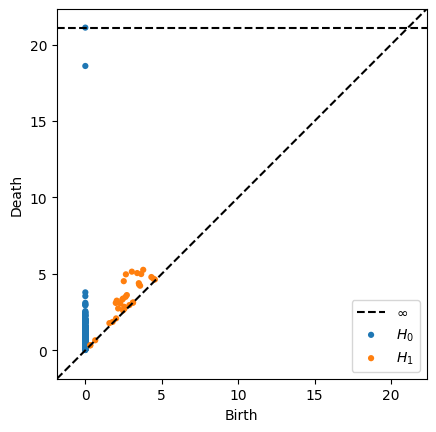

In [43]:
from ripser import ripser
from persim import plot_diagrams

dist_mat = dist_df_to_matrix(test_dist_df)
result = ripser(dist_mat, distance_matrix=True)
persistence_diagram = result['dgms']

plot_diagrams(persistence_diagram)

In [40]:
aux_df=test_dist_df.copy().reset_index(level=1)
# test_dist_df.pivot(values='distance',columns='loc2', index=te)
df_cols=aux_df.pivot(values='distance',columns='loc2')
print(df_cols)
df_cols.to_numpy()

loc2       1100008    1100009    1100010    1100011    1100012    1100013  \
loc1                                                                        
1100008   0.000000   0.423321   1.078222   2.418495   3.127183   3.685272   
1100009   0.423321   0.000000   0.725981   1.995414   2.704986   3.266544   
1100010   1.078222   0.725981   0.000000   1.559221   2.267854   2.866214   
1100011   2.418495   1.995414   1.559221   0.000000   0.716037   1.307266   
1100012   3.127183   2.704986   2.267854   0.716037   0.000000   0.607861   
...            ...        ...        ...        ...        ...        ...   
1100479  17.818580  17.910707  18.512149  18.399647  18.515811  18.443004   
1100480  21.607606  21.698372  22.296889  22.159296  22.256672  22.164297   
1100481  15.194919  15.433162  16.141267  16.598470  16.963581  17.115265   
1100482  14.854168  15.091072  15.798638  16.252660  16.617318  16.769009   
1100483  14.380246  14.555497  15.227727  15.447603  15.717721  15.783705   

array([[ 0.        ,  0.42332069,  1.07822227, ..., 15.19491867,
        14.85416774, 14.38024641],
       [ 0.42332069,  0.        ,  0.72598149, ..., 15.43316163,
        15.09107168, 14.55549671],
       [ 1.07822227,  0.72598149,  0.        , ..., 16.14126711,
        15.79863839, 15.22772661],
       ...,
       [15.19491867, 15.43316163, 16.14126711, ...,  0.        ,
         0.34631239,  2.6783437 ],
       [14.85416774, 15.09107168, 15.79863839, ...,  0.34631239,
         0.        ,  2.50793635],
       [14.38024641, 14.55549671, 15.22772661, ...,  2.6783437 ,
         2.50793635,  0.        ]])